In [1]:
#let's install selenium
!pip install selenium

In [2]:
#first import all necessary libraries
import pandas as pd
import selenium
from selenium import webdriver

In [49]:
#let's load chromedrivers
driver=webdriver.Chrome("chromedriver.exe") 

# Q1
Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. 

In [6]:
url='https://www.amazon.in./'
driver.get(url)

In [7]:
search=driver.find_element_by_id("twotabsearchtextbox")
search.send_keys("Smart Television")

In [8]:
driver.find_element_by_id("nav-search-submit-button").click()

# Question 2
In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a dataframe and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. 

In [20]:
#let's scrape names
names=[]
n=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//span")
for i in n:
    names.append(i.text)
names

['AmazonBasics 108cm (43 inch) Fire TV 4K Ultra HD Smart LED TV AB43U20PS (Black)',
 'AmazonBasics 108cm (43 inch) Fire TV Full HD Smart LED TV AB43E10DS (Black)',
 'OnePlus 108 cm (43 inches) Y Series Full HD LED Smart Android TV 43Y1 (Black) (2020 Model)',
 'OnePlus 80 cm (32 inches) Y Series HD Ready LED Smart Android TV 32Y1 (Black) (2020 Model)',
 'Samsung 80 cm (32 Inches) Wondertainment Series HD Ready LED Smart TV UA32T4340AKXXL (Glossy Black) (2020 Model)',
 'Vu 108 cm (43 inches) Full HD UltraAndroid LED TV 43GA (Black) (2019 Model)',
 'Mi 108 cm (43 Inches) Full HD Android Smart LED TV 4A PRO|L43M5-AN (Black)',
 '',
 'Mi 100 cm (40 Inches) Full HD Android Smart LED TV 4A|L40M5-5AIN (Black)',
 'Mi 80 cm (32 inches) HD Ready Android Smart LED TV 4A PRO|L32M5-AL (Black)',
 'LG 80 cm (32 inches) HD Ready Smart LED TV 32LM563BPTC (Dark Iron Gray) (2020 Model)',
 'Samsung 80 cm (32 inches) Wondertainment Series HD Ready LED Smart TV UA32TE40AAKBXL (Titan Gray) (2020 Model)',
 'TCL

In [11]:
#let's scrape ratings
ratings=[]
for i in driver.find_elements_by_xpath("//div[@class='a-row a-size-small']/span"):
    ratings.append(i.get_attribute("aria-label"))
ratings

['4.2 out of 5 stars',
 '949',
 '4.2 out of 5 stars',
 '772',
 '4.1 out of 5 stars',
 '17,494',
 '4.1 out of 5 stars',
 '17,494',
 '4.3 out of 5 stars',
 '5,972',
 '4.3 out of 5 stars',
 '8,651',
 '4.3 out of 5 stars',
 '45,304',
 '4.4 out of 5 stars',
 '2,716',
 '4.3 out of 5 stars',
 '45,304',
 '4.3 out of 5 stars',
 '45,304',
 '4.3 out of 5 stars',
 '8,371',
 '4.3 out of 5 stars',
 '5,972',
 '4.2 out of 5 stars',
 '1,297',
 '4.3 out of 5 stars',
 '2,619',
 '4.2 out of 5 stars',
 '1,297',
 '4.3 out of 5 stars',
 '45,304',
 '4.4 out of 5 stars',
 '2,460',
 '4.4 out of 5 stars',
 '292',
 '4.3 out of 5 stars',
 '2,619',
 '4.3 out of 5 stars',
 '376',
 '4.2 out of 5 stars',
 '772',
 '4.2 out of 5 stars',
 '606',
 '4.2 out of 5 stars',
 '1,803',
 '4.3 out of 5 stars',
 '45,304',
 '4.4 out of 5 stars',
 '2,460']

In [12]:
#let's scrape ratings and total ratings
rat1=[]
tot_rat1=[]

for i in range(0,len(ratings),2):
    rat1.append(ratings[i])
    tot_rat1.append(ratings[i+1])


In [31]:
tot_rat1

['949',
 '772',
 '17,494',
 '17,494',
 '5,972',
 '45,304',
 '45,304',
 '8,371',
 '5,972',
 '1,297',
 '2,619',
 '1,297',
 '45,304',
 '2,460',
 '292',
 '2,619',
 '376',
 '772',
 '606',
 '1,803',
 '45,304',
 '2,460']

In [37]:
rat1

['4.2 out of 5 stars',
 '4.2 out of 5 stars',
 '4.1 out of 5 stars',
 '4.1 out of 5 stars',
 '4.3 out of 5 stars',
 '4.3 out of 5 stars',
 '4.3 out of 5 stars',
 '4.3 out of 5 stars',
 '4.3 out of 5 stars',
 '4.2 out of 5 stars',
 '4.3 out of 5 stars',
 '4.2 out of 5 stars',
 '4.3 out of 5 stars',
 '4.4 out of 5 stars',
 '4.4 out of 5 stars',
 '4.3 out of 5 stars',
 '4.3 out of 5 stars',
 '4.2 out of 5 stars',
 '4.2 out of 5 stars',
 '4.2 out of 5 stars',
 '4.3 out of 5 stars',
 '4.4 out of 5 stars']

In [14]:
#let's scrape price
price1=[]
price=driver.find_elements_by_xpath("//span[@class='a-price-whole']")
for i in price:
    
    if i.text is None:
         price1.append("--")
    else:
        price1.append(i.text)
    
price1

['28,999',
 '24,999',
 '26,999',
 '15,999',
 '17,299',
 '23,999',
 '25,999',
 '',
 '22,999',
 '15,999',
 '16,999',
 '17,799',
 '14,999',
 '20,999',
 '14,999',
 '25,999',
 '15,999',
 '26,999',
 '20,999',
 '36,999',
 '14,999',
 '17,499',
 '36,999',
 '15,999',
 '15,999']

In [16]:
#let's scrape delivery date of product
delivery=[]
for i in driver.find_elements_by_xpath("//span[@class='a-text-bold']"):
    delivery.append(i.text)
delivery

['Thu, 8 Jul, 8:00 am - 5:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Thu, 8 Jul, 8:00 am - 5:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Thu, 8 Jul, 8:00 am - 5:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Mon, 12 Jul, 7:00 am - 9:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm',
 'Mon, 5 Jul, 7:00 am - 9:00 pm']

In [43]:
#let's scrape urls
url1=[]
for i in driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']"):
    url1.append(i.get_attribute('href'))
url1

['https://www.amazon.in./gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A03318122T4DIRUP1K34F&url=%2FAmazonBasics-108cm-inch-Ultra-Smart%2Fdp%2FB087JWLZ2K%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3DSmart%2BTelevision%26qid%3D1625294106%26sr%3D8-1-spons%26psc%3D1&qualifier=1625294106&id=5949269919635985&widgetName=sp_atf',
 'https://www.amazon.in./gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A09857633O74ZGCPQ882B&url=%2FAmazonBasics-108cm-inch-Full-Smart%2Fdp%2FB087JY84QQ%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3DSmart%2BTelevision%26qid%3D1625294106%26sr%3D8-2-spons%26psc%3D1&qualifier=1625294106&id=5949269919635985&widgetName=sp_atf',
 'https://www.amazon.in./OnePlus-inches-Smart-Android-43Y1/dp/B08B42HNH7/ref=sr_1_3?dchild=1&keywords=Smart+Television&qid=1625294106&sr=8-3',
 'https://www.amazon.in./OnePlus-inches-Ready-Android-32Y1/dp/B08B42LWKN/ref=sr_1_4?dchild=1&keywords=Smart+Television&qid=1625294106&sr=8-4',
 'htt

In [50]:
url1

['https://www.amazon.in./gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A03318122T4DIRUP1K34F&url=%2FAmazonBasics-108cm-inch-Ultra-Smart%2Fdp%2FB087JWLZ2K%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3DSmart%2BTelevision%26qid%3D1625294106%26sr%3D8-1-spons%26psc%3D1&qualifier=1625294106&id=5949269919635985&widgetName=sp_atf',
 'https://www.amazon.in./gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A09857633O74ZGCPQ882B&url=%2FAmazonBasics-108cm-inch-Full-Smart%2Fdp%2FB087JY84QQ%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3DSmart%2BTelevision%26qid%3D1625294106%26sr%3D8-2-spons%26psc%3D1&qualifier=1625294106&id=5949269919635985&widgetName=sp_atf',
 'https://www.amazon.in./OnePlus-inches-Smart-Android-43Y1/dp/B08B42HNH7/ref=sr_1_3?dchild=1&keywords=Smart+Television&qid=1625294106&sr=8-3',
 'https://www.amazon.in./OnePlus-inches-Ready-Android-32Y1/dp/B08B42LWKN/ref=sr_1_4?dchild=1&keywords=Smart+Television&qid=1625294106&sr=8-4',
 'htt

In [44]:
#let's scrape next pages
next_page=[]
for i in driver.find_elements_by_xpath("//li[@class='a-normal']/a"):
    next_page.append(i.get_attribute('href'))
next_page

['https://www.amazon.in./s?k=Smart+Television&page=2&qid=1625294106&ref=sr_pg_2',
 'https://www.amazon.in./s?k=Smart+Television&page=3&qid=1625294106&ref=sr_pg_3']

In [52]:
#let's scrape data from next pages
ratings23=[]
namesP1=[]
price23=[]
delivery23=[]
url23=[]
for i in next_page:
    driver.get(i)
    for j in driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']//span"):
        namesP1.append(j.text)
    for k in driver.find_elements_by_xpath("//div[@class='a-row a-size-small']/span"):
        ratings23.append(k.get_attribute('aria-label'))
    for l in driver.find_elements_by_xpath("//span[@class='a-price-whole']"):
        price23.append(l.text)
    for m in driver.find_elements_by_xpath("//span[@class='a-text-bold']"):
        delivery23.append(m.text)
    for n in driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']"):
        url23.append(n.get_attribute('href'))

namesP1

['TCL 100 cm (40 inches) Full HD Certified Android Smart LED TV 40S6500FS (Black) (2020 Model)',
 'TCL 80 cm (32 inches) HD Ready Certified Android Smart LED TV 32P30S (Black)',
 'OnePlus 125.7 cm (50 inches) U Series 4K LED Smart Android TV 50U1S (Black) (2021 Model)',
 'Mi 125.7 cm (50 Inches) 4K Ultra HD Android Smart LED TV 4X|L50M5-5AIN (Black)',
 'eAirtec 81 cms (32 inches) HD Ready Smart LED TV 32DJSM (Black) (2020 Model)',
 'Samsung 138 cm (55 inches) Crystal 4K Pro Series Ultra HD Smart LED TV UA55AUE70AKLXL (Black) (2021 Model)',
 'Redmi 139 cm (55 inches) 4K Ultra HD Android Smart LED TV X55|L55M6-RA (Black) (2021 Model)',
 'Vu 126 cm (50 inches) 4K Ultra HD Smart Android LED TV | With 5-Hotkeys 50UT (Black) (2020 Model)',
 'Toshiba 80 cm (32 inches) Vidaa OS Series HD Ready Smart ADS LED TV 32L5050 (Black) (2020 Model)',
 'Samsung 125 cm (50 inches) Crystal 4K Series Ultra HD Smart LED TV UA50AUE60AKLXL (Black) (2021 Model)',
 'AmazonBasics 80cm (32 inch) Fire HD LED Smart 

In [58]:
rat23=[]
tot_rat23=[]
for i in range(0,len(ratings23),2):
    rat23.append(ratings23[i])
    tot_rat23.append(ratings23[i+1])

In [62]:
name=names+namesP1
Price=price1+price23
rating=rat1+rat23
no_on_rat=tot_rat1+tot_rat23
delivery=delivery+delivery23
urls=url1+url23


In [64]:
#let's create dataframe
Smart_Telivison=pd.DataFrame({})

In [66]:
Smart_Telivison['Names']=name
Smart_Telivison['Price']=Price
Smart_Telivison['Rating']=rating
Smart_Telivison['No_Of_Ratings']=no_on_rat
Smart_Telivison['Delivery']=delivery
Smart_Telivison['Product_urls']=urls
Smart_Telivison


,Names,Price,Rating,No_Of_Ratings,Delivery,Product_urls
0,AmazonBasics 108cm (43 inch) Fire TV 4K Ultra ...,"28,999",4.2 out of 5 stars,949,"Thu, 8 Jul, 8:00 am - 5:00 pm",https://www.amazon.in./gp/slredirect/picassoRe...
1,AmazonBasics 108cm (43 inch) Fire TV Full HD S...,"24,999",4.2 out of 5 stars,772,"Mon, 5 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./gp/slredirect/picassoRe...
2,OnePlus 108 cm (43 inches) Y Series Full HD LE...,"26,999",4.1 out of 5 stars,"17,494","Mon, 5 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./OnePlus-inches-Smart-An...
3,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"15,999",4.1 out of 5 stars,"17,494","Mon, 5 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./OnePlus-inches-Ready-An...
4,Samsung 80 cm (32 Inches) Wondertainment Serie...,"17,299",4.3 out of 5 stars,"5,972","Mon, 5 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./Samsung-Inches-Wonderta...
...,...,...,...,...,...,...
61,Redmi 164 cm (65 inches) 4K Ultra HD Android S...,"59,999",4.2 out of 5 stars,"1,805","Mon, 5 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./Redmi-inches-Ultra-Andr...
62,Vu 164cm (65inches) Cinema TV Action Series 4K...,"65,860",4.4 out of 5 stars,546,"Sat, 10 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./65inches-Cinema-Android...
63,Sony Bravia 80 cm (32 inches) HD Ready Smart L...,"25,490",4.6 out of 5 stars,515,"Mon, 5 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./Sony-Bravia-inches-Read...
64,AmazonBasics 139cm (55 inch) Fire TV 4K Ultra ...,"39,999",4.2 out of 5 stars,950,"Mon, 12 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./gp/slredirect/picassoRe...


In [69]:
#let's create csv file
Smart_Telivison.to_csv("New_telivision_csv.csv")

In [70]:
pd.read_csv("New_telivision_csv.csv")

,Unnamed: 0,Names,Price,Rating,No_Of_Ratings,Delivery,Product_urls
0,0,AmazonBasics 108cm (43 inch) Fire TV 4K Ultra ...,"28,999",4.2 out of 5 stars,949,"Thu, 8 Jul, 8:00 am - 5:00 pm",https://www.amazon.in./gp/slredirect/picassoRe...
1,1,AmazonBasics 108cm (43 inch) Fire TV Full HD S...,"24,999",4.2 out of 5 stars,772,"Mon, 5 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./gp/slredirect/picassoRe...
2,2,OnePlus 108 cm (43 inches) Y Series Full HD LE...,"26,999",4.1 out of 5 stars,"17,494","Mon, 5 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./OnePlus-inches-Smart-An...
3,3,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"15,999",4.1 out of 5 stars,"17,494","Mon, 5 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./OnePlus-inches-Ready-An...
4,4,Samsung 80 cm (32 Inches) Wondertainment Serie...,"17,299",4.3 out of 5 stars,"5,972","Mon, 5 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./Samsung-Inches-Wonderta...
...,...,...,...,...,...,...,...
61,61,Redmi 164 cm (65 inches) 4K Ultra HD Android S...,"59,999",4.2 out of 5 stars,"1,805","Mon, 5 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./Redmi-inches-Ultra-Andr...
62,62,Vu 164cm (65inches) Cinema TV Action Series 4K...,"65,860",4.4 out of 5 stars,546,"Sat, 10 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./65inches-Cinema-Android...
63,63,Sony Bravia 80 cm (32 inches) HD Ready Smart L...,"25,490",4.6 out of 5 stars,515,"Mon, 5 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./Sony-Bravia-inches-Read...
64,64,AmazonBasics 139cm (55 inch) Fire TV 4K Ultra ...,"39,999",4.2 out of 5 stars,950,"Mon, 12 Jul, 7:00 am - 9:00 pm",https://www.amazon.in./gp/slredirect/picassoRe...


# Q3
Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’. 

In [12]:
#let's open webpage
url='https://images.google.com/?gws_rd=ssl'
driver.get(url)

In [5]:
#do search for fruits
search=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search.send_keys("fruits")

In [6]:
#click on search btn
driver.find_element_by_xpath("//button[@class='Tg7LZd']").click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQlCy3oYbyuVFpu_1gPqRsxYmFnuhD8TyY33w&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScNsyItlDyI1EElKhTmRzYCioXSNaDvYNztw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQc65bNSDE9i7baVuF9ftpQkabn68R7FKCJyw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSsZyKU4pEUcVP2x_GtXrgZ8kRbLhim4vwD5Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQCOVVYHwTsUQcY7dnyC3GgppF8lmLOAxaQzQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQA6yOWfPWP2ncAFz-eKvuGPQB4KfbpqzT5vA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJGFCOcZwhRYqGOJlL4jdcaoyPabUO8Zu8pg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQioIYpIr5c7BW4jNiUiLt-5W_-oK-i-I061w&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcREf50eNWUXvn
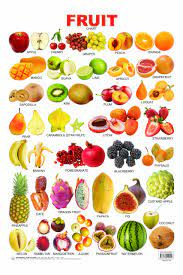
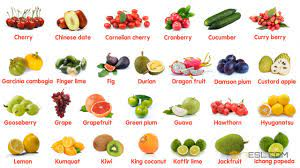
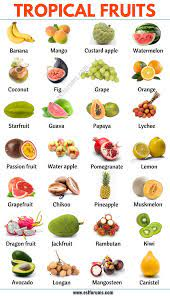
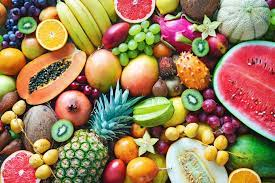
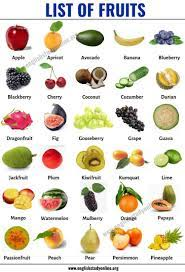
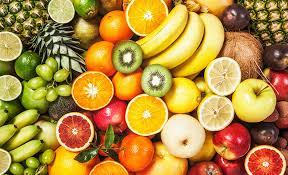
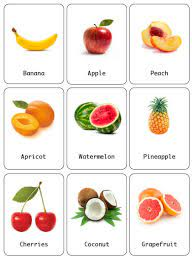
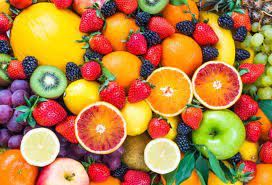
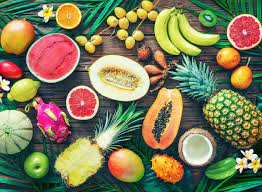
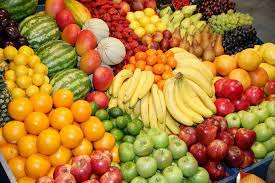
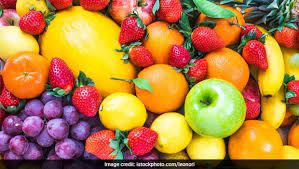
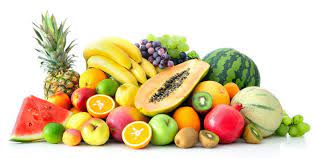
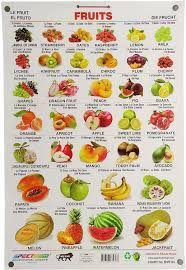
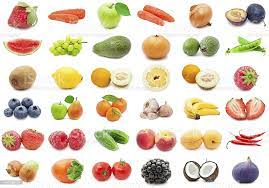
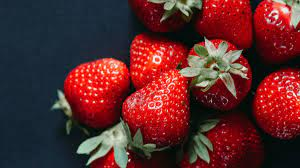
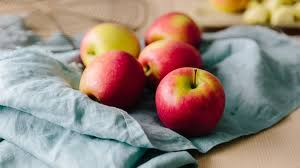
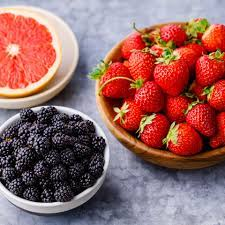
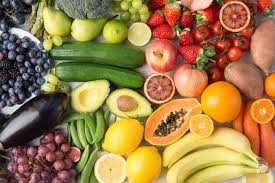
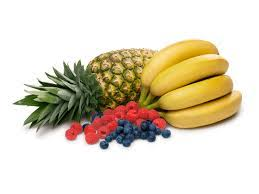
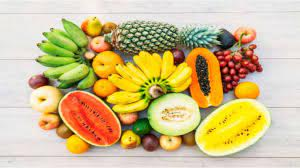

In [7]:
#scrape fruit image url
fruits_image=[]
for i in driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']"):
    fruits_image.append(i.get_attribute("src"))
fruits_image

In [13]:
#do search for cars
search=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search.send_keys("cars")

In [14]:
#clic on search btn
driver.find_element_by_xpath("//button[@class='Tg7LZd']").click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPTXYOJCG-NmDxyu_Rzo6oO5OMgCdRWgTkkA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxbjXwkwVr-14A0KU5__5zZb-b5nUEyJv2Rg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyMurcEluQ5blOUZgaUN_RAAsFJYgp37mLXQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSlpGoItMqWkOmfAKHTEtI1wIiTb7GTvaqmkA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0RH3CjFt4bVDpgqpoNsZKRoXu2GgfHulhvw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsrYZ8FpwbKRzyuPzYY778qdzRcnXYf90D5Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeDzALvuU-JHAQbcfIXuDQasss_tlsTBioRw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3HcVG27eK--uy6usCydFQ3udgQUt8firi2A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQjFcOsHo5tC
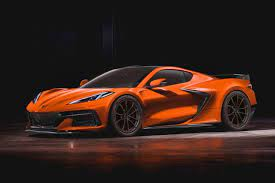
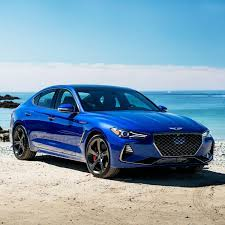
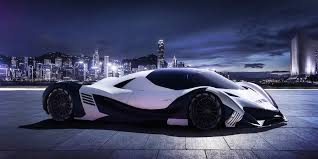
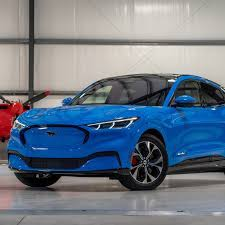
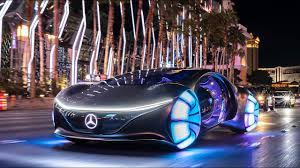
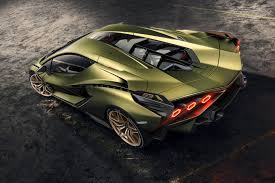
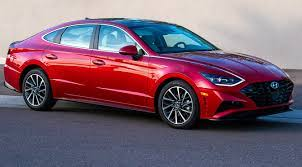
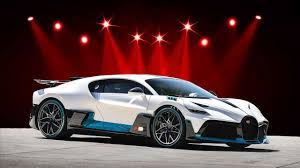
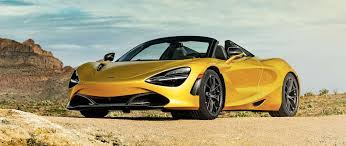
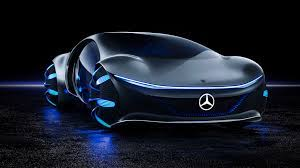
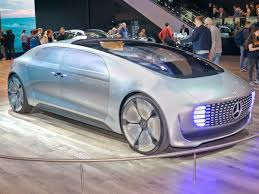
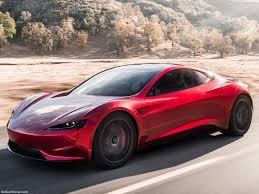
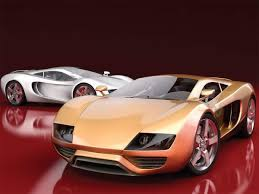
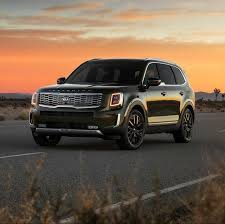
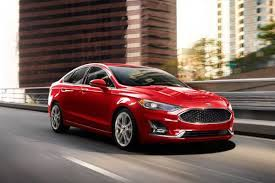
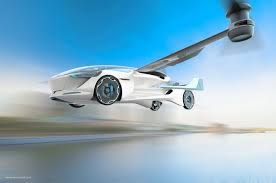
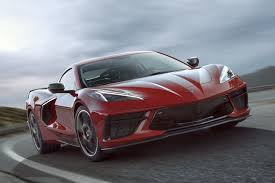
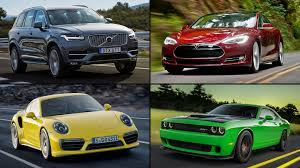
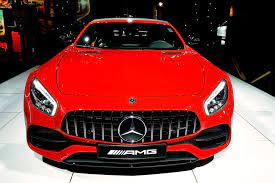
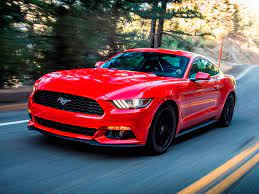

In [19]:
#let's scrape data for cars
cars=[]
for i in driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']"):
    cars.append(i.get_attribute("src"))
cars

In [29]:
#let's scrape data for machine learning
url='https://images.google.com/?gws_rd=ssl'
driver.get(url)
search=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search.send_keys("Machine Learning")
driver.find_element_by_xpath("//button[@class='Tg7LZd']").click()


['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRrGoA2Crpg8Xcqacy8jDQELbeolPDWu-GykQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRqX-g9A6tbPAlpj85G-no0fk7A3xH1wFUcyQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRl5Xu-T4-nc9bxvkM4n2o8a_KUFJBVbYXnNQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9jSIVMuAS2N4w2cdGf5iA178b_C3Rz6wtvw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1VXGCyLKk_U8qzQ31abMiOSM3lg953_Qw3A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQulizjoCvcETV2mLWm9WcZ0mlsl-MjY0B7RQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRE67Yw0hsTJd-ro2Mtcp68V14E7wM9g95-Vg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBSnQdgRaQQ
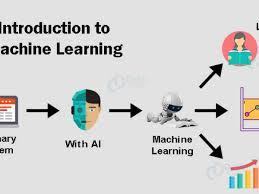
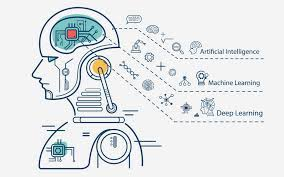
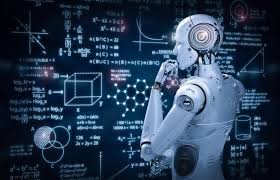
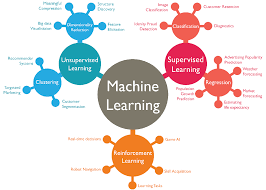
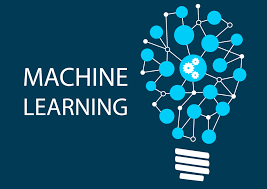
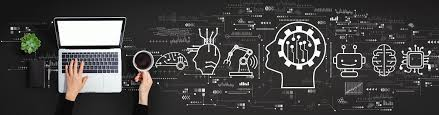
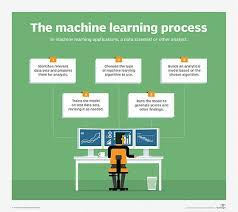
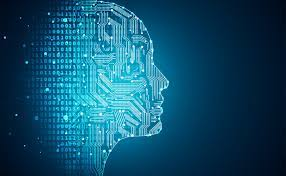
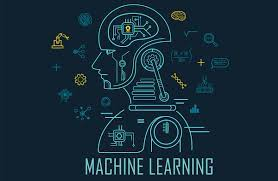
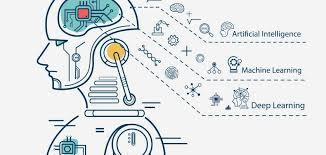
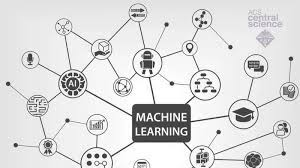
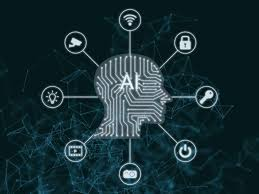
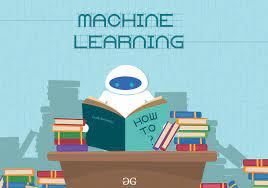
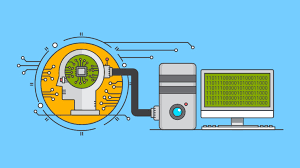
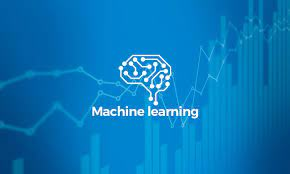
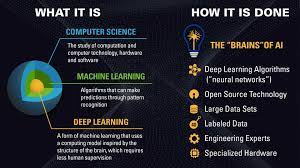
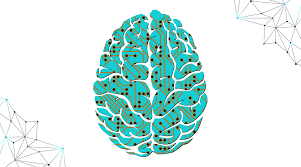
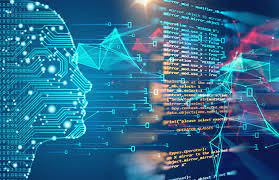
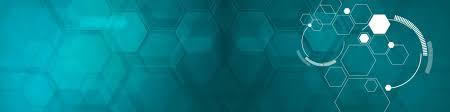
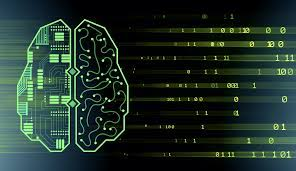

In [30]:
machine=[]
for i in driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']"):
    machine.append(i.get_attribute("src"))
machine

In [32]:
#let's create dataframe
images=pd.DataFrame({})

In [33]:
images["Fruits_images"]=fruits_image[:100]
images["Car images"]=cars[:100]
images["Machinelearning images"]=machine[:100]
images


,Fruits_images,Car images,Machinelearning images
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
...,...,...,...
95,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
96,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
97,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
98,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...


# Q4
Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. In case if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV. 

In [78]:
#let's open webpage
url='https://www.flipkart.com/'
driver.get(url)

In [79]:
#do search for smartphones
search=driver.find_element_by_class_name("_3704LK")
search.send_keys("smartphone")

In [81]:
#do click
driver.find_element_by_xpath("//button[@class='L0Z3Pu']").click()

In [82]:
#scrape names of phones 
name1=[]
n=driver.find_elements_by_xpath("//div[@class='_4rR01T']")
for i in n:
    name1.append(i.text)
name1

['Infinix Hot 10 Play (Aegean Blue, 64 GB)',
 'Infinix Hot 10 Play (Morandi Green, 64 GB)',
 'realme C21 (Cross Black, 64 GB)',
 'realme C21 (Cross Blue, 64 GB)',
 'realme C21 (Cross Black, 32 GB)',
 'realme C21 (Cross Blue, 32 GB)',
 'Infinix Hot 10 Play (7° Purple, 64 GB)',
 'REDMI 9i (Midnight Black, 64 GB)',
 'POCO M3 (Cool Blue, 64 GB)',
 'realme C20 (Cool Blue, 32 GB)',
 'realme C20 (Cool Grey, 32 GB)',
 'REDMI Note 9 (Shadow Black, 64 GB)',
 'REDMI 9i (Nature Green, 64 GB)',
 'POCO M3 (Power Black, 64 GB)',
 'POCO M3 (Power Black, 128 GB)',
 'REDMI 9i (Sea Blue, 64 GB)',
 'OPPO A53 (Mint Cream, 128 GB)',
 'POCO M2 Reloaded (Mostly Blue, 64 GB)',
 'POCO C3 (Matte Black, 32 GB)',
 'MOTOROLA G10 Power (Breeze Blue, 64 GB)',
 'REDMI 9 Power (Mighty Black, 64 GB)',
 'MOTOROLA E7 Power (Tahiti Blue, 32 GB)',
 'REDMI 9 Prime (Mint Green, 64 GB)',
 'POCO M3 (Cool Blue, 128 GB)']

In [170]:
#lets scrape color and memory
n1=[]
colur=[]

for i in name1:
    n1.append(i.split("(")[0])
    colur.append(i.split("(")[1])
c1=[]
m1=[]
for j in colur:
    c1.append(j.split(",")[0])
    m1.append(j.split(",")[1])
m1
    

[' 64 GB)',
 ' 64 GB)',
 ' 64 GB)',
 ' 64 GB)',
 ' 32 GB)',
 ' 32 GB)',
 ' 64 GB)',
 ' 64 GB)',
 ' 64 GB)',
 ' 32 GB)',
 ' 32 GB)',
 ' 64 GB)',
 ' 64 GB)',
 ' 64 GB)',
 ' 128 GB)',
 ' 64 GB)',
 ' 128 GB)',
 ' 64 GB)',
 ' 32 GB)',
 ' 64 GB)',
 ' 64 GB)',
 ' 32 GB)',
 ' 64 GB)',
 ' 128 GB)']

In [171]:
n1

['Infinix Hot 10 Play ',
 'Infinix Hot 10 Play ',
 'realme C21 ',
 'realme C21 ',
 'realme C21 ',
 'realme C21 ',
 'Infinix Hot 10 Play ',
 'REDMI 9i ',
 'POCO M3 ',
 'realme C20 ',
 'realme C20 ',
 'REDMI Note 9 ',
 'REDMI 9i ',
 'POCO M3 ',
 'POCO M3 ',
 'REDMI 9i ',
 'OPPO A53 ',
 'POCO M2 Reloaded ',
 'POCO C3 ',
 'MOTOROLA G10 Power ',
 'REDMI 9 Power ',
 'MOTOROLA E7 Power ',
 'REDMI 9 Prime ',
 'POCO M3 ']

In [172]:
c1

['Aegean Blue',
 'Morandi Green',
 'Cross Black',
 'Cross Blue',
 'Cross Black',
 'Cross Blue',
 '7° Purple',
 'Midnight Black',
 'Cool Blue',
 'Cool Blue',
 'Cool Grey',
 'Shadow Black',
 'Nature Green',
 'Power Black',
 'Power Black',
 'Sea Blue',
 'Mint Cream',
 'Mostly Blue',
 'Matte Black',
 'Breeze Blue',
 'Mighty Black',
 'Tahiti Blue',
 'Mint Green',
 'Cool Blue']

In [186]:
#let's price
price1=[]
for i in driver.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']"):
    price1.append(i.text)
price1

['₹8,499',
 '₹8,499',
 '₹8,999',
 '₹8,999',
 '₹7,999',
 '₹7,999',
 '₹8,499',
 '₹8,299',
 '₹10,999',
 '₹6,999',
 '₹6,999',
 '₹10,999',
 '₹8,299',
 '₹10,999',
 '₹11,999',
 '₹8,299',
 '₹12,990',
 '₹9,499',
 '₹7,499',
 '₹9,999',
 '₹10,499',
 '₹6,999',
 '₹9,999',
 '₹11,999']

In [124]:
#let's scrape ram,rom,display,camera,procesor data,battery
total=[]
m=driver.find_elements_by_xpath("//li[@class='rgWa7D']")
for i in m:
    total.append(i.text)
total

['4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '17.32 cm (6.82 inch) HD+ Display',
 '13MP + Depth Sensor | 8MP Front Camera',
 '6000 mAh Li-ion Polymer Battery',
 'MediaTek Helio G35 Processor',
 '1 Year on Handset and 6 Months on Accessories',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '17.32 cm (6.82 inch) HD+ Display',
 '13MP + Depth Sensor | 8MP Front Camera',
 '6000 mAh Li-ion Polymer Battery',
 'MediaTek Helio G35 Processor',
 '1 Year on Handset and 6 Months on Accessories',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '16.51 cm (6.5 inch) HD+ Display',
 '13MP + 2MP + 2MP | 5MP Front Camera',
 '5000 mAh Battery',
 'MediaTek Helio G35 Processor',
 '1 Year Warranty for Mobile and 6 Months for Accessories',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '16.51 cm (6.5 inch) HD+ Display',
 '13MP + 2MP + 2MP | 5MP Front Camera',
 '5000 mAh Battery',
 'MediaTek Helio G35 Processor',
 '1 Year Warranty for Mobile and 6 Months for Accessories',
 '3 GB RAM | 32 GB ROM

In [137]:
total.pop(119)


'Stock Android Experience | Think Shield Security'

In [142]:
ram=[]
dis=[]
camera=[]
battery=[]
processor=[]
warranty=[]
for i in range(0,len(total),6):
    ram.append(total[i])
    dis.append(total[i+1])
    camera.append(total[i+2])
    battery.append(total[i+3])
    processor.append(total[i+4])
    warranty.append(total[i+5])
ram


['4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '3 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '3 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '6 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '2 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '2 GB RAM | 32 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '6 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '6 GB RAM | 128 GB ROM | Expandable Upto 512 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '6 GB RAM | 128 GB ROM | Expandable Upto 256 GB',
 '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
 '3 GB RAM | 32 GB ROM | Expandable Upto 512 GB',
 '4 GB RAM | 64 GB ROM',
 '4 GB RAM | 64 GB ROM'

In [181]:
ram1=[]
rom=[]
e=[]
r1=[]
for i in ram:
    ram1.append(i.split("|")[0])
    rom.append(i.split("|")[1])
rom


[' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 32 GB ROM ',
 ' 32 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 32 GB ROM ',
 ' 32 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 128 GB ROM ',
 ' 64 GB ROM ',
 ' 128 GB ROM ',
 ' 64 GB ROM ',
 ' 32 GB ROM ',
 ' 64 GB ROM',
 ' 64 GB ROM',
 ' 32 GB ROM ',
 ' 64 GB ROM ',
 ' 128 GB ROM ']

In [144]:
battery

['6000 mAh Li-ion Polymer Battery',
 '6000 mAh Li-ion Polymer Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '6000 mAh Li-ion Polymer Battery',
 '5000 mAh Lithium Polymer Battery',
 '6000 mAh Lithium-ion Polymer Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5020 mAh Battery',
 '5000 mAh Lithium Polymer Battery',
 '6000 mAh Lithium-ion Polymer Battery',
 '6000 mAh Lithium-ion Polymer Battery',
 '5000 mAh Lithium Polymer Battery',
 '5000 mAh Lithium-ion Polymer Battery',
 '5000 mAh Lithium Polymer Battery',
 '5000 mAh Li-ion Polymer Battery',
 '6000 mAh Battery',
 '6000 mAh Battery',
 '5000 mAh Battery',
 '5020 mAh Battery',
 '6000 mAh Lithium-ion Polymer Battery']

In [145]:
camera

['13MP + Depth Sensor | 8MP Front Camera',
 '13MP + Depth Sensor | 8MP Front Camera',
 '13MP + 2MP + 2MP | 5MP Front Camera',
 '13MP + 2MP + 2MP | 5MP Front Camera',
 '13MP + 2MP + 2MP | 5MP Front Camera',
 '13MP + 2MP + 2MP | 5MP Front Camera',
 '13MP + Depth Sensor | 8MP Front Camera',
 '13MP Rear Camera | 5MP Front Camera',
 '48MP + 2MP + 2MP | 8MP Front Camera',
 '8MP Rear Camera | 5MP Front Camera',
 '8MP Rear Camera | 5MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 13MP Front Camera',
 '13MP Rear Camera | 5MP Front Camera',
 '48MP + 2MP + 2MP | 8MP Front Camera',
 '48MP + 2MP + 2MP | 8MP Front Camera',
 '13MP Rear Camera | 5MP Front Camera',
 '13MP + 2MP + 2MP | 16MP Front Camera',
 '13MP + 8MP + 5MP + 2MP | 8MP Front Camera',
 '13MP + 2MP + 2MP | 5MP Front Camera',
 '48MP + 8MP + 2MP + 2MP | 8MP Front Camera',
 '48MP Rear Camera | 8MP Front Camera',
 '13MP + 2MP | 5MP Front Camera',
 '13MP Rear Camera | 8MP Front Camera',
 '48MP + 2MP + 2MP | 8MP Front Camera']

In [182]:
bcamera=[]
fcamera=[]
for i in camera:
    bcamera.append(i.split("|")[0])
    fcamera.append(i.split("|")[1])
bcamera

['13MP + Depth Sensor ',
 '13MP + Depth Sensor ',
 '13MP + 2MP + 2MP ',
 '13MP + 2MP + 2MP ',
 '13MP + 2MP + 2MP ',
 '13MP + 2MP + 2MP ',
 '13MP + Depth Sensor ',
 '13MP Rear Camera ',
 '48MP + 2MP + 2MP ',
 '8MP Rear Camera ',
 '8MP Rear Camera ',
 '48MP + 8MP + 2MP + 2MP ',
 '13MP Rear Camera ',
 '48MP + 2MP + 2MP ',
 '48MP + 2MP + 2MP ',
 '13MP Rear Camera ',
 '13MP + 2MP + 2MP ',
 '13MP + 8MP + 5MP + 2MP ',
 '13MP + 2MP + 2MP ',
 '48MP + 8MP + 2MP + 2MP ',
 '48MP Rear Camera ',
 '13MP + 2MP ',
 '13MP Rear Camera ',
 '48MP + 2MP + 2MP ']

In [146]:
warranty

['1 Year on Handset and 6 Months on Accessories',
 '1 Year on Handset and 6 Months on Accessories',
 '1 Year Warranty for Mobile and 6 Months for Accessories',
 '1 Year Warranty for Mobile and 6 Months for Accessories',
 '1 Year Warranty for Mobile and 6 Months for Accessories',
 '1 Year Warranty for Mobile and 6 Months for Accessories',
 '1 Year on Handset and 6 Months on Accessories',
 'Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories',
 'One Year Warranty for Handset, 6 Months for Accessories',
 '1 Year Warranty for Mobile and 6 Months for Accessories',
 '1 Year Warranty for Mobile and 6 Months for Accessories',
 '1 Year Manufacturer Warranty for Device and 6 months Manufacturer Warranty for In-box Accessories Including Batteries from the Date of Purchase',
 'Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories',
 'One Year Warranty for Handset, 6 Months for Accessories',
 'One Year Warranty for Handset, 6 Months for Accessories',
 'Br

In [155]:
#let's scrape product urls
prod_url=[]
for i in driver.find_elements_by_xpath("//div[@class='_2kHMtA']//a"):

    prod_url.append(i.get_attribute('href'))
prod_url

['https://www.flipkart.com/infinix-hot-10-play-aegean-blue-64-gb/p/itm1f660c8716944?pid=MOBGFG7URKYYCXUS&lid=LSTMOBGFG7URKYYCXUSZ1U485&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=c1abf2c4-d149-47fb-80cc-019f0424257e.MOBGFG7URKYYCXUS.SEARCH&ppt=hp&ppn=homepage&ssid=ms7szivy8w0000001625112640950&qH=1036ba3c4ed2c021',
 'https://www.flipkart.com/infinix-hot-10-play-morandi-green-64-gb/p/itm1f660c8716944?pid=MOBGFG7U8PDJFFTJ&lid=LSTMOBGFG7U8PDJFFTJDLSYLK&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=c1abf2c4-d149-47fb-80cc-019f0424257e.MOBGFG7U8PDJFFTJ.SEARCH&ppt=hp&ppn=homepage&ssid=ms7szivy8w0000001625112640950&qH=1036ba3c4ed2c021',
 'https://www.flipkart.com/realme-c21-cross-black-64-gb/p/itmf4062d3f37c1a?pid=MOBGF489G9HRWFZ9&lid=LSTMOBGF489G9HRWFZ9BYFZCR&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search&fm=SEARCH&iid=c1

In [185]:
#let's create dataframe
Smartphones1=pd.DataFrame({})


In [188]:
Smartphones1["Names"]=n1
Smartphones1["Colour"]=c1
Smartphones1["Memory"]=m1
Smartphones1["Ram"]=ram1
Smartphones1["Rom"]=rom
Smartphones1["Front Camera"]=fcamera
Smartphones1["Back camera"]=bcamera
Smartphones1["Processor"]=processor
Smartphones1["Display"]=dis
Smartphones1["Battery"]=battery
Smartphones1["Warranty"]=warranty
Smartphones1["Price"]=price1
Smartphones1["Product_url"]=prod_url
Smartphones1


,Names,Colour,Memory,Ram,Rom,Front Camera,Back camera,Processor,Display,Battery,Warranty,Price,Product_url
0,Infinix Hot 10 Play,Aegean Blue,64 GB),4 GB RAM,64 GB ROM,8MP Front Camera,13MP + Depth Sensor,MediaTek Helio G35 Processor,17.32 cm (6.82 inch) HD+ Display,6000 mAh Li-ion Polymer Battery,1 Year on Handset and 6 Months on Accessories,"₹8,499",https://www.flipkart.com/infinix-hot-10-play-a...
1,Infinix Hot 10 Play,Morandi Green,64 GB),4 GB RAM,64 GB ROM,8MP Front Camera,13MP + Depth Sensor,MediaTek Helio G35 Processor,17.32 cm (6.82 inch) HD+ Display,6000 mAh Li-ion Polymer Battery,1 Year on Handset and 6 Months on Accessories,"₹8,499",https://www.flipkart.com/infinix-hot-10-play-m...
2,realme C21,Cross Black,64 GB),4 GB RAM,64 GB ROM,5MP Front Camera,13MP + 2MP + 2MP,MediaTek Helio G35 Processor,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,1 Year Warranty for Mobile and 6 Months for Ac...,"₹8,999",https://www.flipkart.com/realme-c21-cross-blac...
3,realme C21,Cross Blue,64 GB),4 GB RAM,64 GB ROM,5MP Front Camera,13MP + 2MP + 2MP,MediaTek Helio G35 Processor,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,1 Year Warranty for Mobile and 6 Months for Ac...,"₹8,999",https://www.flipkart.com/realme-c21-cross-blue...
4,realme C21,Cross Black,32 GB),3 GB RAM,32 GB ROM,5MP Front Camera,13MP + 2MP + 2MP,MediaTek Helio G35 Processor,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,1 Year Warranty for Mobile and 6 Months for Ac...,"₹7,999",https://www.flipkart.com/realme-c21-cross-blac...
5,realme C21,Cross Blue,32 GB),3 GB RAM,32 GB ROM,5MP Front Camera,13MP + 2MP + 2MP,MediaTek Helio G35 Processor,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,1 Year Warranty for Mobile and 6 Months for Ac...,"₹7,999",https://www.flipkart.com/realme-c21-cross-blue...
6,Infinix Hot 10 Play,7° Purple,64 GB),4 GB RAM,64 GB ROM,8MP Front Camera,13MP + Depth Sensor,MediaTek Helio G35 Processor,17.32 cm (6.82 inch) HD+ Display,6000 mAh Li-ion Polymer Battery,1 Year on Handset and 6 Months on Accessories,"₹8,499",https://www.flipkart.com/infinix-hot-10-play-7...
7,REDMI 9i,Midnight Black,64 GB),4 GB RAM,64 GB ROM,5MP Front Camera,13MP Rear Camera,MediaTek Helio G25 Processor,16.59 cm (6.53 inch) HD+ Display,5000 mAh Lithium Polymer Battery,Brand Warranty of 1 Year Available for Mobile ...,"₹8,299",https://www.flipkart.com/redmi-9i-midnight-bla...
8,POCO M3,Cool Blue,64 GB),6 GB RAM,64 GB ROM,8MP Front Camera,48MP + 2MP + 2MP,Qualcomm Snapdragon 662 Processor,16.59 cm (6.53 inch) Full HD+ Display,6000 mAh Lithium-ion Polymer Battery,"One Year Warranty for Handset, 6 Months for Ac...","₹10,999",https://www.flipkart.com/poco-m3-cool-blue-64-...
9,realme C20,Cool Blue,32 GB),2 GB RAM,32 GB ROM,5MP Front Camera,8MP Rear Camera,MediaTek Helio G35 Processor,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,1 Year Warranty for Mobile and 6 Months for Ac...,"₹6,999",https://www.flipkart.com/realme-c20-cool-blue-...


In [189]:
#let's create csv file
Smartphones1.to_csv("NEw_phones_csv.csv")

In [190]:
pd.read_csv("NEw_phones_csv.csv")

,Unnamed: 0,Names,Colour,Memory,Ram,Rom,Front Camera,Back camera,Processor,Display,Battery,Warranty,Price,Product_url
0,0,Infinix Hot 10 Play,Aegean Blue,64 GB),4 GB RAM,64 GB ROM,8MP Front Camera,13MP + Depth Sensor,MediaTek Helio G35 Processor,17.32 cm (6.82 inch) HD+ Display,6000 mAh Li-ion Polymer Battery,1 Year on Handset and 6 Months on Accessories,"₹8,499",https://www.flipkart.com/infinix-hot-10-play-a...
1,1,Infinix Hot 10 Play,Morandi Green,64 GB),4 GB RAM,64 GB ROM,8MP Front Camera,13MP + Depth Sensor,MediaTek Helio G35 Processor,17.32 cm (6.82 inch) HD+ Display,6000 mAh Li-ion Polymer Battery,1 Year on Handset and 6 Months on Accessories,"₹8,499",https://www.flipkart.com/infinix-hot-10-play-m...
2,2,realme C21,Cross Black,64 GB),4 GB RAM,64 GB ROM,5MP Front Camera,13MP + 2MP + 2MP,MediaTek Helio G35 Processor,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,1 Year Warranty for Mobile and 6 Months for Ac...,"₹8,999",https://www.flipkart.com/realme-c21-cross-blac...
3,3,realme C21,Cross Blue,64 GB),4 GB RAM,64 GB ROM,5MP Front Camera,13MP + 2MP + 2MP,MediaTek Helio G35 Processor,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,1 Year Warranty for Mobile and 6 Months for Ac...,"₹8,999",https://www.flipkart.com/realme-c21-cross-blue...
4,4,realme C21,Cross Black,32 GB),3 GB RAM,32 GB ROM,5MP Front Camera,13MP + 2MP + 2MP,MediaTek Helio G35 Processor,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,1 Year Warranty for Mobile and 6 Months for Ac...,"₹7,999",https://www.flipkart.com/realme-c21-cross-blac...
5,5,realme C21,Cross Blue,32 GB),3 GB RAM,32 GB ROM,5MP Front Camera,13MP + 2MP + 2MP,MediaTek Helio G35 Processor,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,1 Year Warranty for Mobile and 6 Months for Ac...,"₹7,999",https://www.flipkart.com/realme-c21-cross-blue...
6,6,Infinix Hot 10 Play,7° Purple,64 GB),4 GB RAM,64 GB ROM,8MP Front Camera,13MP + Depth Sensor,MediaTek Helio G35 Processor,17.32 cm (6.82 inch) HD+ Display,6000 mAh Li-ion Polymer Battery,1 Year on Handset and 6 Months on Accessories,"₹8,499",https://www.flipkart.com/infinix-hot-10-play-7...
7,7,REDMI 9i,Midnight Black,64 GB),4 GB RAM,64 GB ROM,5MP Front Camera,13MP Rear Camera,MediaTek Helio G25 Processor,16.59 cm (6.53 inch) HD+ Display,5000 mAh Lithium Polymer Battery,Brand Warranty of 1 Year Available for Mobile ...,"₹8,299",https://www.flipkart.com/redmi-9i-midnight-bla...
8,8,POCO M3,Cool Blue,64 GB),6 GB RAM,64 GB ROM,8MP Front Camera,48MP + 2MP + 2MP,Qualcomm Snapdragon 662 Processor,16.59 cm (6.53 inch) Full HD+ Display,6000 mAh Lithium-ion Polymer Battery,"One Year Warranty for Handset, 6 Months for Ac...","₹10,999",https://www.flipkart.com/poco-m3-cool-blue-64-...
9,9,realme C20,Cool Blue,32 GB),2 GB RAM,32 GB ROM,5MP Front Camera,8MP Rear Camera,MediaTek Helio G35 Processor,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,1 Year Warranty for Mobile and 6 Months for Ac...,"₹6,999",https://www.flipkart.com/realme-c20-cool-blue-...


# Q:5
Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps. 

In [37]:
#open webpage
url='https://www.google.com/maps'
driver.get(url)

In [38]:
#search for delhi city
search=driver.find_element_by_id("searchboxinput")
search.send_keys("New Delhi")

In [39]:
driver.find_element_by_id("searchbox-searchbutton").click()

In [41]:
#scrape latitude and logitude od city
alt_long=[]
n= driver.find_element_by_xpath("//button[@class='nGhxh-tv6Bve GaSlwc-uhFGfc-WsjYwc-zfKixb-UacCoe']")

alt_long.append(n.text)
alt_long

['28.683113, 77.205542']

# Question no=6
Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 – September 20) from trak.in. 

In [50]:
#let's open webpage
url='https://trak.in/india-startup-funding-investment-2015/'


In [70]:
# Get the website
driver.get(url)
  

In [121]:
#let's scrape date for july month
r1=[]
row_1=driver.find_elements_by_xpath("//table[@id='tablepress-48']//tbody//tr//td[2]")
for i in row_1:
    r1.append(i.text)
r1
    

['15/07/2020',
 '16/07/2020',
 '16/07/2020',
 '14/07/2020',
 '13/07/2020',
 '09/07/2020',
 '10/07/2020',
 '15/07/2020',
 '14/07/2020',
 '13/07/2020']

In [122]:
#let's scrape date of agust month
d_a=[]
row_1=driver.find_elements_by_xpath("//table[@id='tablepress-49']//tbody//tr//td[2]")
for i in row_1:
    d_a.append(i.text)
d_a

['15/08/2020',
 '13/08/2020',
 '13/08/2020',
 '04/08/2020',
 '11/08/2020',
 '12/08/2020',
 '14/08/2020',
 '10/08/2020',
 '07/08/2020',
 '13/08/2020',
 '03/08/2020',
 '04/08/2020']

In [123]:
#let's scrape date of septmber month
d_s=[]
row_1=driver.find_elements_by_xpath("//table[@id='tablepress-50']//tbody//tr//td[2]")
for i in row_1:
    d_s.append(i.text)
d_s

['08/09/2020',
 '12/09/2020',
 '09/09/2020',
 '02/09/2020',
 '09/09/2020',
 '07/09/2020',
 '07/09/2020',
 '31/08/2020',
 '31/08/2020',
 '03/09/2020',
 '08/09/2020']

In [124]:
#lets scrape startup names
s_n=[]
for i in driver.find_elements_by_xpath("//table[@id='tablepress-48']//tbody//tr//td[3]/a"):
    s_n.append(i.text)
s_n


['Flipkart',
 'Vedantu',
 'Crio',
 'goDutch',
 'Mystifly',
 'JetSynthesys',
 'gigIndia',
 'PumPumPum',
 'FLYX',
 'Open Appliances Pvt. Ltd.']

In [125]:
#lets scrape startup names
s_n1=[]
s_n2=[]
for i in driver.find_elements_by_xpath("//table[@id='tablepress-49']//tbody//tr//td[3]/a"):
    s_n1.append(i.text)
for j in driver.find_elements_by_xpath("//table[@id='tablepress-50']//tbody//tr//td[3]/a"):
    s_n2.append(j.text)
s_n1

['Practo',
 'Medlife',
 'HungerBox',
 'Dunzo',
 'Terra.do',
 'Classplus',
 'Niyo',
 'ZestMoney',
 'FreshToHome',
 'Eduvanz',
 'CrowdPouch',
 'DrinkPrime']

In [127]:
#let's scrape industry data
ind1=[]
ind2=[]
ind3=[]
for i in driver.find_elements_by_xpath("//table[@id='tablepress-48']//tbody//tr//td[4]"):
    ind1.append(i.text)
for j in driver.find_elements_by_xpath("//table[@id='tablepress-49']//tbody//tr//td[4]"):
    ind2.append(j.text)
for k in driver.find_elements_by_xpath("//table[@id='tablepress-50']//tbody//tr//td[4]"):
    ind3.append(k.text)

In [128]:
#let's scrape sub vertical data
sub=[]
sub1=[]
sub2=[]
for i in driver.find_elements_by_xpath("//table[@id='tablepress-48']//tbody//tr//td[5]"):
    sub.append(i.text)
for j in driver.find_elements_by_xpath("//table[@id='tablepress-49']//tbody//tr//td[5]"):
    sub1.append(j.text)
for k in driver.find_elements_by_xpath("//table[@id='tablepress-50']//tbody//tr//td[5]"):
    sub2.append(k.text)

In [129]:
#let's scrape city data
city=[]
city1=[]
city2=[]
for i in driver.find_elements_by_xpath("//table[@id='tablepress-48']//tbody//tr//td[6]"):
    city.append(i.text)
for j in driver.find_elements_by_xpath("//table[@id='tablepress-49']//tbody//tr//td[6]"):
    city1.append(j.text)
for k in driver.find_elements_by_xpath("//table[@id='tablepress-50']//tbody//tr//td[6]"):
    city2.append(k.text)

In [130]:
#let's scrape investors names
in_n=[]
in_n1=[]
in_n2=[]
for i in driver.find_elements_by_xpath("//table[@id='tablepress-48']//tbody//tr//td[7]"):
    in_n.append(i.text)
for j in driver.find_elements_by_xpath("//table[@id='tablepress-49']//tbody//tr//td[7]"):
    in_n1.append(j.text)
for k in driver.find_elements_by_xpath("//table[@id='tablepress-50']//tbody//tr//td[7]"):
    in_n2.append(k.text)

In [132]:
#let's scrape investors type
in_t=[]
in_t1=[]
in_t2=[]
for i in driver.find_elements_by_xpath("//table[@id='tablepress-48']//tbody//tr//td[8]"):
    if i.text is None:
        in_t.append("--")
    else:
        in_t.append(i.text)
for j in driver.find_elements_by_xpath("//table[@id='tablepress-49']//tbody//tr//td[8]"):
    if j.text is None:
        in_t1.append(j.text)
    else:
        in_t1.append(j.text)
for k in driver.find_elements_by_xpath("//table[@id='tablepress-50']//tbody//tr//td[8]"):
    if k.text is None:
        in_t2.append("--")
    else:
        in_t2.append(k.text)

In [134]:
#let's scrape amount data
amt=[]
amt1=[]
amt2=[]
for i in driver.find_elements_by_xpath("//table[@id='tablepress-48']//tbody//tr//td[9]"):
    amt.append(i.text)
for j in driver.find_elements_by_xpath("//table[@id='tablepress-49']//tbody//tr//td[9]"):
    amt1.append(j.text)
for k in driver.find_elements_by_xpath("//table[@id='tablepress-50']//tbody//tr//td[9]"):
    amt2.append(k.text)

In [138]:
date1=r1+d_a+d_s
startup1=s_n+s_n1+s_n2
industry1=ind1+ind2+ind3
Sub1=sub+sub1+sub2
City1=city+city1+city2
investors1=in_n+in_n1+in_n2
inv_type1=in_t+in_t1+in_t2
Amount1=amt+amt1+amt2


In [140]:
#let's create dataframe
Funding_deals=pd.DataFrame({})

In [141]:
Funding_deals['Date']=date1
Funding_deals['Startup_name']=startup1
Funding_deals['Industry']=industry1
Funding_deals['Sub_vertical']=Sub1
Funding_deals['City']=City1
Funding_deals['Investors_Name']=investors1
Funding_deals['Investors_Type']=inv_type1
Funding_deals['Amount(in USD)']=Amount1
Funding_deals


,Date,Startup_name,Industry,Sub_vertical,City,Investors_Name,Investors_Type,Amount(in USD)
0,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,"1,200,000,000"
1,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,"100,000,000"
2,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,"934,160"
3,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Cap...",Seed,"1,700,000"
4,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticketi...",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,"3,300,000"
5,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
6,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
7,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,"292,800"
8,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,"200,000"
9,13/07/2020,Open Appliances Pvt. Ltd.,Information Technology,Internet-of-Things Security Solutions,Bangalore,Unicorn India Ventures,Venture-Series Unknown,"500,000"


In [142]:
#let's create csv file
Funding_deals.to_csv("New_funding.csv")
pd.read_csv("New_funding.csv")

,Unnamed: 0,Date,Startup_name,Industry,Sub_vertical,City,Investors_Name,Investors_Type,Amount(in USD)
0,0,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,"1,200,000,000"
1,1,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,"100,000,000"
2,2,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,"934,160"
3,3,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Cap...",Seed,"1,700,000"
4,4,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticketi...",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,"3,300,000"
5,5,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
6,6,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
7,7,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,"292,800"
8,8,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,"200,000"
9,9,13/07/2020,Open Appliances Pvt. Ltd.,Information Technology,Internet-of-Things Security Solutions,Bangalore,Unicorn India Ventures,Venture-Series Unknown,"500,000"


# Q:7
Write a program to scrap all the available details of best gaming laptops from digit.in

In [34]:
#let's open webpage
url='https://www.digit.in/top-products/best-gaming-laptops-40.html'
driver.get(url)

In [62]:
#let's scrape names
names=[]
n1=driver.find_elements_by_id("toptenIdevent1")
for i in n1:
    names.append(i.text.replace("\n",''))
n2=driver.find_elements_by_id("toptenIdevent2")
for i in n2:
    names.append(i.text.replace("\n",''))
n3=driver.find_elements_by_id("toptenIdevent3")
for i in n3:
    names.append(i.text.replace("\n",''))
n4=driver.find_elements_by_id("toptenIdevent4")
for i in n4:
    names.append(i.text.replace("\n",''))
n5=driver.find_elements_by_id("toptenIdevent5")
for i in n5:
    names.append(i.text.replace("\n",''))
n6=driver.find_elements_by_id("toptenIdevent6")
for i in n6:
    names.append(i.text.replace("\n",''))
n7=driver.find_elements_by_id("toptenIdevent7")
for i in n7:
    names.append(i.text.replace("\n",''))

In [63]:

names

['1.ALIENWARE AREA 51M R2',
 '2.ALIENWARE M15 R3',
 '3.ASUS ROG STRIX SCAR 15',
 '4.ASUS ROG ZEPHYRUS G14',
 '5.LENOVO LEGION 5I',
 '6.ASUS ROG ZEPHYRUS DUO 15',
 '7.ACER ASPIRE 7 GAMING']

In [38]:
#let's scrape operating systems,memeory,processor,display
os=[]
os1=[]
mem=[]
proce=[]
dis=[]
for i in driver.find_elements_by_xpath("//div[@class='value']"):
    os.append(i.text)
os
    



['WINDOWS 10 HOME',
 '17.3" (1920 X 1080)',
 '10TH GENERATION INTEL® CORE™ I7-10700 | 2.90 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (3840 X 2160)',
 '10TH GENERATION INTEL® CORE™ I9-10980HK | NA',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (1920 X 1080)',
 'AMD RYZEN™ 9 5900HX | 3.3 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME',
 '14" (1920 X 1080)',
 'AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 PRO',
 '15.6" (1920 X 1080)',
 '10TH GENERATION INTEL® CORE™ I5-10300H | 2.50 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10',
 '15.6" (3840 X 1100)',
 'INTEL CORE I7 10TH GEN 10875H | NA',
 '512 GB SSD/4 GBGB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (1920 X 1080)',
 'AMD RYZEN™ 5-5500U HEXA-CORE | NA',
 '512 GB SSD/8 GBGB DDR4']

In [43]:
os1=[]
dis=[]
proce=[]
mem=[]
for i in range(0,len(os),4):
    os1.append(os[i])
    dis.append(os[i+1])
    proce.append(os[i+2])
    mem.append(os[i+3])
    
mem

['1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '512 GB SSD/4 GBGB DDR4',
 '512 GB SSD/8 GBGB DDR4']

In [44]:
os1

['WINDOWS 10 HOME',
 'WINDOWS 10 HOME',
 'WINDOWS 10 HOME',
 'WINDOWS 10 HOME',
 'WINDOWS 10 PRO',
 'WINDOWS 10',
 'WINDOWS 10 HOME']

In [45]:
dis

['17.3" (1920 X 1080)',
 '15.6" (3840 X 2160)',
 '15.6" (1920 X 1080)',
 '14" (1920 X 1080)',
 '15.6" (1920 X 1080)',
 '15.6" (3840 X 1100)',
 '15.6" (1920 X 1080)']

In [46]:
proce

['10TH GENERATION INTEL® CORE™ I7-10700 | 2.90 GHZ',
 '10TH GENERATION INTEL® CORE™ I9-10980HK | NA',
 'AMD RYZEN™ 9 5900HX | 3.3 GHZ',
 'AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ',
 '10TH GENERATION INTEL® CORE™ I5-10300H | 2.50 GHZ',
 'INTEL CORE I7 10TH GEN 10875H | NA',
 'AMD RYZEN™ 5-5500U HEXA-CORE | NA']

In [68]:
f=[]
print1=driver.find_elements_by_tag_name("p")
for i in print1:
    f.append(i.text)
len(f)
    
    

17

In [71]:
full_des=f[3:10]

In [72]:
len(full_des)

7

In [76]:
#let's create dataframe
Gaming_Laptops1=pd.DataFrame({})

In [77]:
Gaming_Laptops1['Names']=names
Gaming_Laptops1['Operating_system']=os1
Gaming_Laptops1['Memory']=mem
Gaming_Laptops1['Dispaly']=dis
Gaming_Laptops1['Processor']=proce
Gaming_Laptops1['Full_description']=full_des
Gaming_Laptops1

,Names,Operating_system,Memory,Dispaly,Processor,Full_description
0,1.ALIENWARE AREA 51M R2,WINDOWS 10 HOME,1 TB SSD/16 GBGB DDR4,"17.3"" (1920 X 1080)",10TH GENERATION INTEL® CORE™ I7-10700 | 2.90 GHZ,If you want the absolute best when it comes to...
1,2.ALIENWARE M15 R3,WINDOWS 10 HOME,1 TB SSD/16 GBGB DDR4,"15.6"" (3840 X 2160)",10TH GENERATION INTEL® CORE™ I9-10980HK | NA,If the Area 51M is a bit too much for you then...
2,3.ASUS ROG STRIX SCAR 15,WINDOWS 10 HOME,1 TB SSD/16 GBGB DDR4,"15.6"" (1920 X 1080)",AMD RYZEN™ 9 5900HX | 3.3 GHZ,When the ASUS ROG Strix Scar 15 ended up on ou...
3,4.ASUS ROG ZEPHYRUS G14,WINDOWS 10 HOME,1 TB SSD/16 GBGB DDR4,"14"" (1920 X 1080)",AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ,The Asus Zephyrus G14 is a first-of-its-kind g...
4,5.LENOVO LEGION 5I,WINDOWS 10 PRO,1 TB SSD/16 GBGB DDR4,"15.6"" (1920 X 1080)",10TH GENERATION INTEL® CORE™ I5-10300H | 2.50 GHZ,AVAILABLE
5,6.ASUS ROG ZEPHYRUS DUO 15,WINDOWS 10,512 GB SSD/4 GBGB DDR4,"15.6"" (3840 X 1100)",INTEL CORE I7 10TH GEN 10875H | NA,Lenovo's Legion 5i is also a suitable laptop f...
6,7.ACER ASPIRE 7 GAMING,WINDOWS 10 HOME,512 GB SSD/8 GBGB DDR4,"15.6"" (1920 X 1080)",AMD RYZEN™ 5-5500U HEXA-CORE | NA,The machine is powered by an Intel Core i7-108...


In [80]:
#let's create csv file
Gaming_Laptops1.to_csv("New_Csv_File.csv")
pd.read_csv("New_Csv_File.csv")


,Unnamed: 0,Names,Operating_system,Memory,Dispaly,Processor,Full_description
0,0,1.ALIENWARE AREA 51M R2,WINDOWS 10 HOME,1 TB SSD/16 GBGB DDR4,"17.3"" (1920 X 1080)",10TH GENERATION INTEL® CORE™ I7-10700 | 2.90 GHZ,If you want the absolute best when it comes to...
1,1,2.ALIENWARE M15 R3,WINDOWS 10 HOME,1 TB SSD/16 GBGB DDR4,"15.6"" (3840 X 2160)",10TH GENERATION INTEL® CORE™ I9-10980HK | NA,If the Area 51M is a bit too much for you then...
2,2,3.ASUS ROG STRIX SCAR 15,WINDOWS 10 HOME,1 TB SSD/16 GBGB DDR4,"15.6"" (1920 X 1080)",AMD RYZEN™ 9 5900HX | 3.3 GHZ,When the ASUS ROG Strix Scar 15 ended up on ou...
3,3,4.ASUS ROG ZEPHYRUS G14,WINDOWS 10 HOME,1 TB SSD/16 GBGB DDR4,"14"" (1920 X 1080)",AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ,The Asus Zephyrus G14 is a first-of-its-kind g...
4,4,5.LENOVO LEGION 5I,WINDOWS 10 PRO,1 TB SSD/16 GBGB DDR4,"15.6"" (1920 X 1080)",10TH GENERATION INTEL® CORE™ I5-10300H | 2.50 GHZ,AVAILABLE
5,5,6.ASUS ROG ZEPHYRUS DUO 15,WINDOWS 10,512 GB SSD/4 GBGB DDR4,"15.6"" (3840 X 1100)",INTEL CORE I7 10TH GEN 10875H | NA,Lenovo's Legion 5i is also a suitable laptop f...
6,6,7.ACER ASPIRE 7 GAMING,WINDOWS 10 HOME,512 GB SSD/8 GBGB DDR4,"15.6"" (1920 X 1080)",AMD RYZEN™ 5-5500U HEXA-CORE | NA,The machine is powered by an Intel Core i7-108...


# Question 8
 Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”

In [7]:
#let's open webpage
url='https://www.forbes.com/billionaires/'
driver.get(url)

In [11]:
# Creating empty list and scrape data for names,rank,net_worth,age,country,source,industry
name=[]
rank=[]
net=[]
age=[]
country=[]
source=[]
industry=[]

for i in driver.find_elements_by_xpath("//div[@class='rank']"):
    rank.append(i.text)
for j in driver.find_elements_by_xpath("//div[@class='personName']//div"):
    name.append(j.text)
for k in driver.find_elements_by_xpath("//div[@class='netWorth']/div"):
    net.append(k.text)
for l in driver.find_elements_by_xpath("//div[@class='age']//div"):
    age.append(l.text)
for m in driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']"):
    country.append(m.text)
for n in driver.find_elements_by_xpath("//div[@class='source-column']//div"):
    source.append(n.text)
for o in driver.find_elements_by_xpath("//div[@class='category']//div"):
    industry.append(o.text)


In [12]:
s1=[]
for i in range(0,len(source),2):
    s1.append(source[i])

In [14]:
#scrape data from next pages
name1=[]
rank1=[]
net1=[]
age1=[]
country1=[]

industry1=[]
s2=[]
while(True):
    for i in driver.find_elements_by_xpath("//div[@class='rank']"):
        rank1.append(i.text)
    for j in driver.find_elements_by_xpath("//div[@class='personName']//div"):
        name1.append(j.text)
    for k in driver.find_elements_by_xpath("//div[@class='netWorth']/div"):
        net1.append(k.text)
    for l in driver.find_elements_by_xpath("//div[@class='age']//div"):
        age1.append(l.text)
    for m in driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']"):
        country1.append(m.text)
    for n in driver.find_elements_by_xpath("//div[@class='source-column']//div"):
        s2.append(n.text)
    for o in driver.find_elements_by_xpath("//div[@class='category']//div"):
        industry1.append(o.text)
    try:

        next_button = driver.find_element_by_xpath("//button[@class='pagination-btn pagination-btn--next ']")

        next_button.click()

    except:
        break

In [21]:
source1=[]

for i in range(0,len(s2),2):
    source1.append(s2[i])
source1

['Amazon',
 'Tesla, SpaceX',
 'LVMH',
 'Microsoft',
 'Facebook',
 'Berkshire Hathaway',
 'software',
 'Google',
 'Google',
 'diversified',
 'Zara',
 "L'Oréal",
 'beverages, pharmaceuticals',
 'Microsoft',
 'internet media',
 'telecom',
 'Walmart',
 'Walmart',
 'Walmart',
 'Bloomberg LP',
 'e-commerce',
 'Amazon',
 'Quicken Loans',
 'infrastructure, commodities',
 'Nike',
 'e-commerce',
 'Koch Industries',
 'Koch Industries',
 'internet, telecom',
 'Dell computers',
 'fashion retail',
 'luxury goods',
 'media',
 'supermarkets',
 'package delivery',
 'casinos',
 'home appliances',
 'retail',
 'TikTok',
 'Nutella, chocolates',
 'Chanel',
 'Chanel',
 'diversified',
 'pig breeding',
 'online games',
 'music, chemicals',
 'real estate',
 'candy, pet food',
 'candy, pet food',
 'real estate',
 'steel, investments',
 'batteries',
 'real estate',
 'BMW, pharmaceuticals',
 'metals',
 'Red Bull',
 'soy sauce',
 'shipping',
 'steel, transport',
 'e-commerce',
 'mining',
 'eyeglasses',
 'sensors',


In [22]:
names=name+name1
Net_Worth=net+net1
Rank=rank+rank1
Age=age+age1
Source=s1+source1
Industry=industry+industry1
Country=country+country1

In [23]:
#let's create dataframe
Billionaires_List=pd.DataFrame({})

In [25]:
Billionaires_List['Rank']=Rank
Billionaires_List['Names']=names
Billionaires_List['Net_worth']=Net_Worth
Billionaires_List['Age']=Age
Billionaires_List['Country']=Country
Billionaires_List['Source']=Source
Billionaires_List['Industry']=Industry
Billionaires_List



,Rank,Names,Net_worth,Age,Country,Source,Industry
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
2950,2674.,Daniel Yong Zhang,$1 B,49,China,e-commerce,Technology
2951,2674.,Zhang Yuqiang,$1 B,65,China,Fiberglass,Manufacturing
2952,2674.,Zhao Meiguang,$1 B,58,China,gold mining,Metals & Mining
2953,2674.,Zhong Naixiong,$1 B,58,China,conglomerate,Diversified


# Question no=9
 Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video

In [198]:
#let's open webpage
url='https://www.youtube.com/watch?v=3wi65UW_nJk'
driver.get(url)

In [241]:
#let's scrape comments
cmt=[]
for i in driver.find_elements_by_xpath("//yt-formatted-string[@class='style-scope ytd-comment-renderer']|/span[@class='style-scope yt-formatted-string']"):
    cmt.append(i.text)
cmt

['',
 'FOR EVERY SOUL THAT HAS COME ACROSS THIS MAY YOU RECEIVE MORE BLESSINGS THAN YOU EXPECT........MUCH RESPECT',
 '',
 'How I’m going to start 2020 \n1-praying everyday\n2-stop cursing\n3-eat healthy',
 '',
 'My father said he regretted having me as a firstborn. My mother regrets having me born. Most of my friends have abandoned me. I left my school because of my depression and grades. I almost made an attempt on my life on a train track. The only reason I can stand today months later is because of the belief that this isn’t the end. The belief that things will get better and that my story isn’t over yet. I hope anyone reading this knows, that your life is worth so much more and that the only one that determines your worth is yourself',
 '',
 '"Who speaks to the broken?" It hits  me everytime I listen to it',
 '',
 'This has been one of the toughest weeks of my life. \n\nI will get into medical school',
 '',
 'they said i was dumb... but guess who got accepted into the med school',

In [243]:
#let's scrape date when comment posted
date=[]
for i in driver.find_elements_by_xpath("//yt-formatted-string[@class='published-time-text above-comment style-scope ytd-comment-renderer']/a"):
    date.append(i.text)
date


['1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago (edited)',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '2 years ago',
 '1 year ago (edited)',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '2 years ago (edited)',
 '1 year ago',
 '1 year ago',
 '1 year ago (edited)',
 '1 year ago',
 '2 years ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '2 years ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '2 years ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '2 years ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '2 years ago',
 '2 months ago',
 '8 months ago',
 '1 year ago',
 '1 year ago',
 '2 years ago',
 '1 year ago (edited)',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '1 year ago',
 '8 months ag

In [245]:
c1=[]
for i in range(0,len(cmt),2):
    c1.append(cmt[i+1])
c1

['FOR EVERY SOUL THAT HAS COME ACROSS THIS MAY YOU RECEIVE MORE BLESSINGS THAN YOU EXPECT........MUCH RESPECT',
 'How I’m going to start 2020 \n1-praying everyday\n2-stop cursing\n3-eat healthy',
 'My father said he regretted having me as a firstborn. My mother regrets having me born. Most of my friends have abandoned me. I left my school because of my depression and grades. I almost made an attempt on my life on a train track. The only reason I can stand today months later is because of the belief that this isn’t the end. The belief that things will get better and that my story isn’t over yet. I hope anyone reading this knows, that your life is worth so much more and that the only one that determines your worth is yourself',
 '"Who speaks to the broken?" It hits  me everytime I listen to it',
 'This has been one of the toughest weeks of my life. \n\nI will get into medical school',
 'they said i was dumb... but guess who got accepted into the med school',
 '"Who speaks to the broken?"

In [248]:
#let's create dataframe
Comments=pd.DataFrame({})


""


In [249]:
Comments['Comments']=c1
Comments['Date when comment posted']=date
Comments

,Comments,Date when comment posted
0,FOR EVERY SOUL THAT HAS COME ACROSS THIS MAY Y...,1 year ago
1,How I’m going to start 2020 \n1-praying everyd...,1 year ago
2,My father said he regretted having me as a fir...,1 year ago
3,"""Who speaks to the broken?"" It hits me everyt...",1 year ago
4,This has been one of the toughest weeks of my ...,1 year ago
...,...,...
515,you just save a life brother,1 year ago
516,I swear I just do so much better with at least...,1 year ago
517,Med school entry exams in two days. Just had a...,1 year ago
518,"TY FOR THE VIDEO , I'M +15 , -22 LEAGUE OF LEG...",1 year ago


# Q 10
 Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description

In [272]:
#let.s open webpage
url='https://www.hostelworld.com/ in'
driver.get(url)

In [273]:
#do search for london 
s1=driver.find_element_by_id("home-search-keywords")
s1.send_keys("London")

In [275]:
#do click
driver.find_element_by_xpath("//button[@class='btn btn-primary btn-block']").click()

In [276]:
#scrape for names
names=[]
n=driver.find_elements_by_xpath("//h2[@class='title title-6']//a")
for i in n:
    names.append(i.text)
names

["St Christopher's Village",
 'Generator London',
 'Safestay London Kensington Holland Park',
 'PubLove @ The Crown, Battersea',
 'Leman House',
 '247london Hostel and Private Rooms',
 'Selina Camden',
 'PubLove @ The Steam Engine, Waterloo',
 'The London Home Hostel',
 "Wombat's The City Hostel London",
 'Safestay London Elephant & Castle',
 'PubLove @ The Green Man, Paddington',
 'Astor Museum Inn',
 'PubLove @ The White Ferry, Victoria',
 'Prime Backpackers Angel',
 'Atlas Hostels',
 'No.8 Willesden Hostel London',
 'SoHostel',
 'Keystone House Kings Cross',
 'Clink261',
 'Burlington Residence',
 'London Waterloo Hostel',
 'Astor Hyde Park',
 'Abercorn House',
 "St Christopher's Oasis-Female Only",
 'Astor Kensington',
 'New Cross Inn Hostel',
 'Mapesbury Hostel',
 'Hootananny Hostel',
 'Phoenix Hostel']

In [277]:
#scrape distance from city data
dist1=[]
d2=driver.find_elements_by_xpath("//span[@class='description']")

In [278]:
dist1=[]
for i in d2:
    dist1.append(i.text)
dist1

['Hostel - 1.8km from city centre',
 'Hostel - 3km from city centre',
 'Hostel - 5.9km from city centre',
 'Hostel - 4.7km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 8.2km from city centre',
 'Hostel - 5.5km from city centre',
 'Hostel - 0.5km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 1.7km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 2.2km from city centre',
 'Hostel - 2.4km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 10km from city centre',
 'Hostel - 2km from city centre',
 'Hostel - 3.5km from city centre',
 'Hostel - 3.2km from city centre',
 'Hostel - 7.1km from city centre',
 'Hostel - 0.7km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 7.3km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 4.9km from city centre',
 'Hostel - 6.1km from city centre',
 'Hostel - 8.2km from city centre

In [279]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

In [281]:
#let's scrape ratings
Ratings1=[]

r1= driver.find_elements_by_xpath("//div[@class='score orange big']")
for i in r1:
          try:
    
           Ratings1.append(i.text) 
        
          except  NoSuchElementException:
            Ratings1.append("--")
          

In [282]:
Ratings1

['8.9',
 '7.5',
 '7.9',
 '7.9',
 '8.7',
 '7.7',
 '9.3',
 '8.0',
 '6.9',
 '9.6',
 '9.1',
 '10',
 '8.8',
 '9.0',
 '9.7',
 '10',
 '9.7',
 '7.8',
 '9.2',
 '7.8',
 '8.6',
 '9.0',
 '7.5',
 '7.8',
 '8.3']

In [284]:
#let's scrape reviews
re=[]
r1=driver.find_elements_by_xpath("//div[@class='keyword']")
for i in r1:
    if i.text is None:
        re.append("--")
    else:
        
        re.append(i.text)
re

['NEW',
 'Superb',
 'Fabulous',
 'Fabulous',
 'Very Good',
 'Very Good',
 'Very Good',
 'No Rating',
 'No Rating',
 'NEW',
 'Fabulous',
 'Very Good',
 'Superb',
 'Fabulous',
 'Good',
 'Superb',
 'Superb',
 'Superb',
 'No Rating',
 'Fabulous',
 'Superb',
 'Superb',
 'Superb',
 'Superb',
 'Very Good',
 'Superb',
 'Very Good',
 'Fabulous',
 'Superb',
 'Very Good',
 'Rating',
 'Very Good',
 'Fabulous']

In [289]:
#scrape total reviews
tot_re=[]
for i in driver.find_elements_by_xpath("//div[@class='reviews']"):
    if i.text is None:
        tot_re.append("--")
    else:
        tot_re.append(i.text)
tot_re
    

['10814 Total Reviews',
 '6729 Total Reviews',
 '1070 Total Reviews',
 '204 Total Reviews',
 '13 Total Reviews',
 '443 Total Reviews',
 '0 Total Reviews',
 '183 Total Reviews',
 '248 Total Reviews',
 '13123 Total Reviews',
 '3930 Total Reviews',
 '391 Total Reviews',
 '8706 Total Reviews',
 '128 Total Reviews',
 '513 Total Reviews',
 '193 Total Reviews',
 '4558 Total Reviews',
 '3946 Total Reviews',
 '8109 Total Reviews',
 '3165 Total Reviews',
 '25 Total Reviews',
 '2399 Total Reviews',
 '11320 Total Reviews',
 '3652 Total Reviews',
 '593 Total Reviews',
 '6323 Total Reviews',
 '997 Total Reviews',
 '357 Total Reviews',
 '1405 Total Reviews',
 '3393 Total Reviews']

In [291]:
#scrape data for private and dorms price
p_p=[]
for i in driver.find_elements_by_xpath("//div[@class='price title-5']|//p[@class='no-price body-3 no-privates']|//p[@class='no-price body-3 no-dorms']"):
    if i.text is None:
        p_p.append("--")
    else:
        p_p.append(i.text)
p_p

['Rs4683',
 'Rs1499',
 'Rs8473',
 'Rs2127',
 'No Privates Available',
 'Rs1019',
 'No Privates Available',
 'Rs1297',
 'Rs5866',
 'No Dorms Available',
 'Rs5249',
 'No Dorms Available',
 'Rs13317',
 'Rs2830',
 'Rs16811',
 'Rs1683',
 'Rs4116',
 'Rs1626',
 'Rs7843',
 'Rs2964',
 'Rs3242',
 'Rs1019',
 'Rs11578',
 'Rs1822',
 'Rs5317',
 'Rs1990',
 'Rs20423',
 'Rs2177',
 'Rs6196',
 'Rs2513',
 'Rs11115',
 'No Dorms Available',
 'No Privates Available',
 'Rs904',
 'No Privates Available',
 'Rs2127',
 'Rs4285',
 'No Dorms Available',
 'Rs8188',
 'Rs1406',
 'No Privates Available',
 'Rs2099',
 'No Privates Available',
 'Rs1755',
 'Rs5317',
 'Rs1990',
 'Rs3087',
 'Rs1835',
 'Rs5283',
 'Rs1602',
 'Rs5317',
 'Rs1784',
 'No Privates Available',
 'Rs1312',
 'Rs4631',
 'No Dorms Available',
 'No Privates Available',
 'Rs1923',
 'Rs3080',
 'Rs1839']

In [292]:
len(p_p)

60

In [293]:
private=[]
dorms=[]
for i in range(0,len(p_p),2):
    private.append(p_p[i])
    dorms.append(p_p[i+1])
private
    

['Rs4683',
 'Rs8473',
 'No Privates Available',
 'No Privates Available',
 'Rs5866',
 'Rs5249',
 'Rs13317',
 'Rs16811',
 'Rs4116',
 'Rs7843',
 'Rs3242',
 'Rs11578',
 'Rs5317',
 'Rs20423',
 'Rs6196',
 'Rs11115',
 'No Privates Available',
 'No Privates Available',
 'Rs4285',
 'Rs8188',
 'No Privates Available',
 'No Privates Available',
 'Rs5317',
 'Rs3087',
 'Rs5283',
 'Rs5317',
 'No Privates Available',
 'Rs4631',
 'No Privates Available',
 'Rs3080']

In [294]:
dorms

['Rs1499',
 'Rs2127',
 'Rs1019',
 'Rs1297',
 'No Dorms Available',
 'No Dorms Available',
 'Rs2830',
 'Rs1683',
 'Rs1626',
 'Rs2964',
 'Rs1019',
 'Rs1822',
 'Rs1990',
 'Rs2177',
 'Rs2513',
 'No Dorms Available',
 'Rs904',
 'Rs2127',
 'No Dorms Available',
 'Rs1406',
 'Rs2099',
 'Rs1755',
 'Rs1990',
 'Rs1835',
 'Rs1602',
 'Rs1784',
 'Rs1312',
 'No Dorms Available',
 'Rs1923',
 'Rs1839']

In [295]:
#let's scrape facilities
facility=[]
for i in driver.find_elements_by_xpath("//div[@class='facilities-label facilities']"):
    try:
        facility.append(i.text)
        
    except NOSuchElementException:
        facility.append("--")
        
facility


['Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi',
 'Free WiFi',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFree Breakfast\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFree Breakfast\nFollows Covid-19 sanitation guidance',
 'Free WiFi\nFollows Covid-19 sanitation guidance',
 '',
 'Free WiFi\nFollows Covid-19 san

In [297]:
#let's scrape property descrption
d1=[]
for i in driver.find_elements_by_class_name("view-button"):
    d1.append(i.get_attribute("href"))
    

In [299]:
des=[]
for i in d1:
    driver.get(i)
    for j in driver.find_elements_by_xpath("//div[@class='description-container']/div"):
        des.append(j.text.replace("\n",''))
des

["Hostelworld saysHostelworld visitors have said St Christopher's Village is 'the place to go if you are young and want to have fun'. This 'party hostel' has 'nice staff and just the right amount of rooms/travellers', making it 'easy for anyone to meet new people'. One of our guests said this hostel is 'within short walking distance of two subway [stations] and well within walking distance from more of the major attractions in downtown London'.",
 'Property DescriptionCOVID 19 Policy Update.In response to Coronavirus (COVID-19), additional safety and sanitation measures are currently in effect at this property, including social distancing and in-house disinfection. St Christopher’s Inns at The Village in London Bridge is the UK’s first capsule hostel. Its brand new rooms have been specially designed for our guests to get the best night sleep possible before they wake up in amongst one of London’s most vibrant areas. Voted as one of the best party hostels in the world, our multi-award w

In [352]:
#let's create empty list
names23=[]
distnce=[]
ratings23=[]
no_of_rat=[]
reviews23=[]
pp=[]
fac=[]
desc23=[]

In [353]:
#let's scrape data from next  pages
while(True):
   
    for i in driver.find_elements_by_xpath("//h2[@class='title title-6']//a"):
        names23.append(i.text)
    for j in driver.find_elements_by_xpath("//span[@class='description']"):
        distnce.append(j.text)
     
    for l in driver.find_elements_by_xpath("//div[@class='score orange big']"):
        try:
    
             ratings23.append(l.text) 
        
        except  NoSuchElementException:
            ratings23.append("--")
    for m in driver.find_elements_by_xpath("//div[@class='keyword']"):
         reviews23.append(m.text)
    for n in driver.find_elements_by_xpath("//div[@class='reviews']"):
        no_of_rat.append(n.text)
    for o in driver.find_elements_by_xpath("//div[@class='facilities-label facilities']"):
        fac.append(o.text)
    for p in driver.find_elements_by_xpath("//div[@class='price title-5']|//p[@class='no-price body-3 no-privates']|//p[@class='no-price body-3 no-dorms']"):
        pp.append(p.text)
    for q in driver.find_elements_by_class_name("view-button"):
        desc23.append(q.get_attribute('href'))
    try:
            next_button = driver.find_element_by_xpath("//div[@class='pagination-item pagination-next']")
            next_button.click()
    except:
        break

In [358]:
private1=[]
dorms1=[]
for i in range(0,len(pp),2):
    private1.append(pp[i])
    dorms1.append(pp[i+1])
private1

['Rs4683',
 'Rs8473',
 'No Privates Available',
 'No Privates Available',
 'Rs5866',
 'Rs5249',
 'Rs13317',
 'Rs16811',
 'Rs4116',
 'Rs7843',
 'Rs3242',
 'Rs11578',
 'Rs5317',
 'Rs20423',
 'Rs6196',
 'Rs11115',
 'No Privates Available',
 'No Privates Available',
 'Rs4285',
 'Rs8188',
 'No Privates Available',
 'No Privates Available',
 'Rs5317',
 'Rs3087',
 'Rs5283',
 'Rs5317',
 'No Privates Available',
 'Rs4631',
 'No Privates Available',
 'Rs3080',
 'No Privates Available',
 'Rs4381',
 'Rs5050',
 'Rs5856',
 'Rs5574',
 'Rs12761',
 'Rs4116',
 'Rs6020',
 'Rs4116',
 'Rs5436',
 'Rs3430',
 'No Privates Available',
 'No Privates Available',
 'Rs5540',
 'No Privates Available',
 'Rs19173',
 'Rs11485',
 'Rs2245',
 'Rs5214',
 'Rs2952',
 'Rs5746',
 'Rs4116',
 'Rs5351',
 'Rs13464',
 'Rs3808',
 'Rs3671',
 'Rs4291',
 'Rs4665',
 'Rs6261',
 'Rs4116',
 'Rs3808',
 'Rs5815',
 'Rs6072',
 'Rs5928',
 'Rs6576',
 'Rs4374',
 'Rs4569',
 'Rs9301',
 'Rs12349',
 'Rs6483',
 'Rs6175',
 'Rs4528',
 'Rs6433',
 'Rs535

In [359]:
des23=[]
for i in desc23:
    driver.get(i)
    for j in driver.find_elements_by_xpath("//div[@class='description-container']/div"):
        des23.append(j.text.replace("\n",''))


In [450]:
names123=names+names23
distance=dist1+distnce
ratings123=Ratings1+ratings23
no_tot_rat1=tot_re+no_of_rat
reviews123=re+reviews23
private_price=private+private1
dorms_price=dorms+dorms1
facilities=facility+fac
Property_Descrition=des+des23

In [457]:
#let's create dataframe
Hostel1=pd.DataFrame({})

In [462]:
Hostel1['Names']=names123
Hostel1['Distance from city']=distance
Hostel1['reviwes']=reviews123
Hostel1['total_reviwes']=no_tot_rat1
Hostel1['Dorms_price']=dorms_price
Hostel1['Private_price']=private_price
Hostel1['Facilities']=facilities
Hostel1['Property Description']=Property_Descrition
Hostel1



,Names,Distance from city,reviwes,total_reviwes,Dorms_price,Private_price,Facilities,Property Description
0,St Christopher's Village,Hostel - 1.8km from city centre,Superb,10814 Total Reviews,Rs1499,Rs4683,Free WiFi\nFollows Covid-19 sanitation guidance,Property DescriptionCOVID 19 Policy Update.In ...
1,Generator London,Hostel - 3km from city centre,Fabulous,6729 Total Reviews,Rs2127,Rs8473,Free WiFi\nFollows Covid-19 sanitation guidance,Property DescriptionGenerator London is a desi...
2,Safestay London Kensington Holland Park,Hostel - 5.9km from city centre,Fabulous,1070 Total Reviews,Rs1019,No Privates Available,Free WiFi,Property DescriptionSafestay Holland ParkSafes...
3,"PubLove @ The Crown, Battersea",Hostel - 4.7km from city centre,Very Good,204 Total Reviews,Rs1297,No Privates Available,Free WiFi\nFollows Covid-19 sanitation guidance,Property DescriptionDo London like a local.Sta...
4,Leman House,Hostel - 3.6km from city centre,Very Good,13 Total Reviews,No Dorms Available,Rs5866,Free WiFi,Property DescriptionPeople come from different...
...,...,...,...,...,...,...,...,...
109,Park Hotel Essex,Hotel - 24.1km from city centre,No Rating,108 Total Reviews,No Dorms Available,Rs3602,Free Breakfast\nFollows Covid-19 sanitation gu...,Property DescriptionThis Hotel is the right ch...
110,Cranbrook Hotel,Hotel - 14.8km from city centre,No Rating,58 Total Reviews,No Dorms Available,Rs3602,Free Breakfast\nFollows Covid-19 sanitation gu...,Property DescriptionWe are located about twent...
111,St. Athans,Bed and Breakfast - 2.9km from city centre,No Rating,234 Total Reviews,No Dorms Available,Rs3949,Free WiFi\nFollows Covid-19 sanitation guidance,Property DescriptionThe St Athans Hotel is a p...
112,Aron Guest House,Bed and Breakfast - 13.1km from city centre,Rating,26 Total Reviews,No Dorms Available,Rs6689,Free WiFi,Property DescriptionAron Guest House provides ...
